# Compartimentalization 

![schéma du neurone symétrique.png](<attachment:schéma du neurone symétrique.png>)
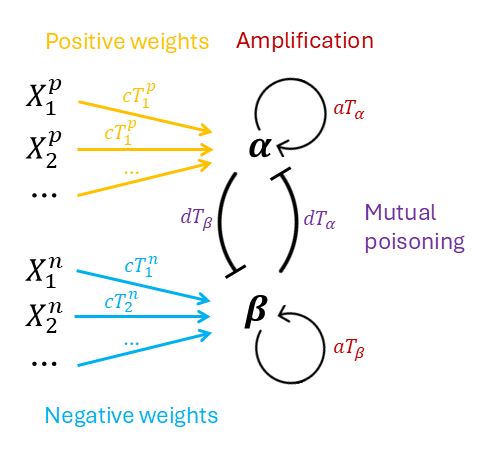

## 1-Theory
In this section, previsouly called quantities "$X_i^p$" and "$X_j^n$" are  the number of positive particle of type $i$ and negative particle of tpe $j$ in the bulk phase, whereas  "$k_i$" and "$l_j$" are the same quantities for the species $i$ and $j$ but in a droplet.

### Hypothesis and possible improvements
-We first only consider noise over entries and not over reaction, the latter would have lead us to consider Gillespi simultion.

-We consider quantities of A and B to be *high enough* to consider the linearized version of our equation, i.e. the following one.


-Our previous equations were over concentrations a and b. Nevertheless, one would think in term of number of particles. Therefore, we shall have the number of particle A=aV and B=bV as a function of the characteristic volume V of a droplet. Yet, such a volume can be a random variable...
To adress more simply the problem, we first consider such volume to be constant. Then, we can write $\frac{dA}{dt} = PV + \frac{\lambda_a \cdot A }{1 + k_a/V \cdot A} - \eta_a \cdot A - \mu_a/V \cdot A B$. Provinding the rescaling $P/V\rightarrow P$, $k_a / V\rightarrow k_a$ and $\mu_a /V \rightarrow \mu_a$, one can write the stoechiometric version of the system 



$$
\frac{dA}{dt} = P + \frac{\lambda_a \cdot A}{1 + k_a \cdot A} - \eta_a \cdot A - \mu_a \cdot AB
$$
$$
\frac{dB}{dt} = N + \frac{\lambda_b \cdot B}{1 + k_b \cdot B} - \eta_b \cdot B - \mu_b \cdot AB
$$

Where:
- $A,B$: number of particles
- $P=\sum_i w_i^pk_i, N=\sum_j w_j^n l_j $: external input/production rates
- $\lambda_a, \lambda_b$: growth rate constants
- $k_a, k_b$: saturation constants (Hill-type terms)
- $\eta_a, \eta_b$: decay or dilution rates
- $\mu_a, \mu_b$: interaction strengths between $a$ and $b$

We nevertheless keep the notation $A\rightarrow a$ and $B\rightarrow b$ for simplicity.

### 1.1 Joint Probability

In the bulk, there are multiple “positive” (blue squares and rectangles) and “negative” (yellow squares and rectangles) DNA species serving as inputs. This distribution is described by the vectors $\vec{X}_1 = (\#~\text{positive species 1},~\#~\text{positive species 2},~...)$ and $\vec{Y}_1 = (\#~\text{negative species 1},~\#~\text{negative species 2},~...)$, representing the number of positive and negative input species in the bulk, as illustrated in Figure \ref{fig:legend neural network}. The subscript in the bulk vectors refers to the first-layer inputs.

The solution is then compartmentalized into droplets during the \textit{inoculation phase}. The number of positive and negative species within each droplet is a random variable. The resulting distribution of input species in droplets is denoted by $\vec{x}$ and $\vec{y}$, which are the droplet analogues of the bulk vectors $\vec{X}$ and $\vec{Y}$.

Thus, the joint probability of having $n$ total particles in a compartment (with average $\lambda$), $m$ of which are from the positive class (and $n - m$ from the negative), and with specific species distributions $\vec{x}$ and $\vec{y}$, is given by:

$$
P_{\lambda}(n, m, \vec{x}, \vec{y}) =
\underbrace{e^{-\lambda} \frac{\lambda^n}{n!}}_{\text{Poisson: total count}}
\cdot
\underbrace{\binom{n}{m} r^m (1 - r)^{n - m}}_{\text{Binomial: } m | n}
\cdot
\underbrace{\frac{m!}{\prod_i x_i!} \prod_i (p_i)^{x_i}}_{\text{Multinomial: } \vec{x} | m}
\cdot
\underbrace{\frac{(n - m)!}{\prod_j y_j!} \prod_j (q_j)^{y_j}}_{\text{Multinomial: } \vec{y} | n - m}
$$

where we have defined $r=\frac{\sum_i X_i}{\sum_i(X_i+Y_j)}$ as the probability that a randomly chosen DNA among the n is of class P. We also define the probability of a positive and negative input of species $i$ as $p_i=\frac{X_i}{\sum_iX_i}$ and $q_i=\frac{Y_i}{\sum_iY_i}$, both being normalized and with constraints $\sum_ix_i=m$ and $\sum_jy_j=n-m$.
The compartmentalization dynamics is given below. 

### 1.3 Compartimentalization dynamic
![reseau de neurone.png](<attachment:reseau de neurone.png>)
![reseau de neurone legende.png](<attachment:reseau de neurone legende.png>)

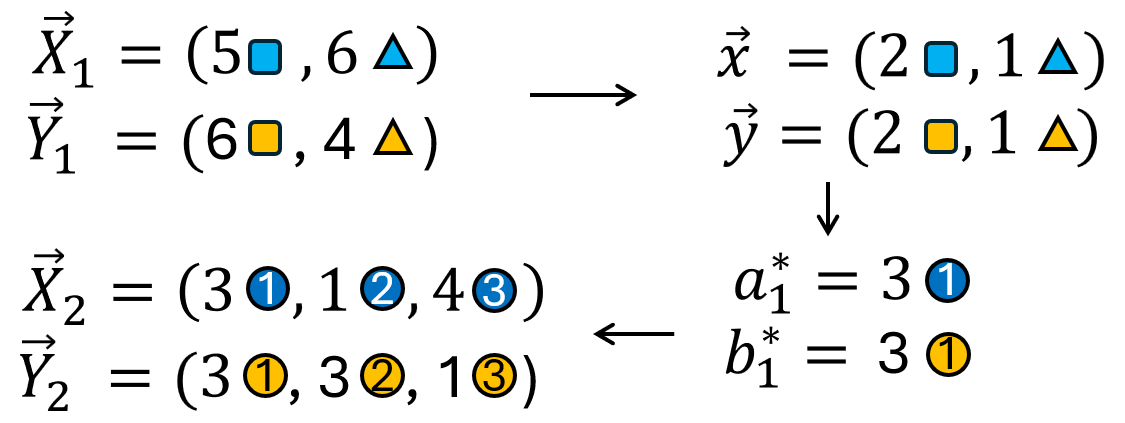
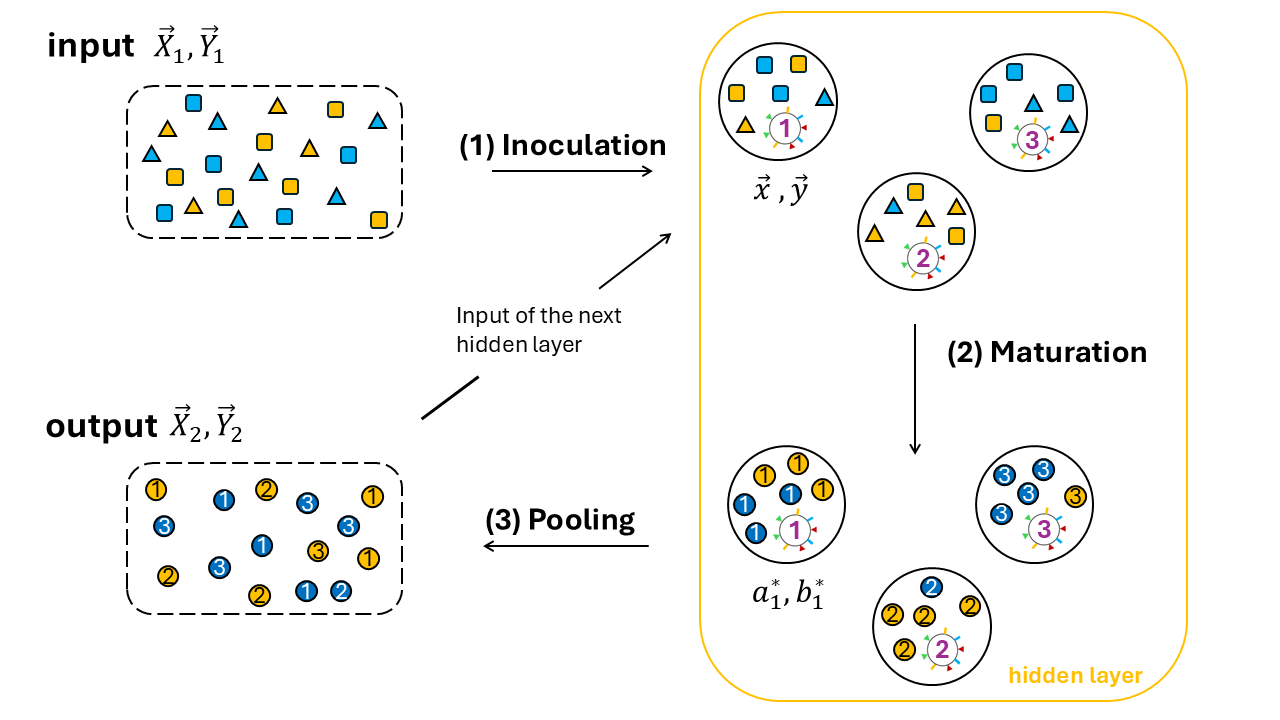

## 2. Simulation

Note that any arbitrary classification task can be achieved by a
 feedforward neural network with one hidden layer [9], and can
 be realized in our proposed system by settingcorresponding con centrations in the followingsystematicway, thus reconfigurable.
The input layer consists of two inputs u1 and u2; the output
 layer requires log2(numberofclasses) neurons.Each neuron in
 the hidden layer can define a separating hyperplane in the input
 space, so the number of required neurons equals the number of
 distinct inequalities involved in the criterion specified.[paper_François_Fage]

**How much neuron and layer do we need?**

Let us take a classification task with *n* entries (ex characteristic of a disease ) associated with *k* classes (ex tumor or not tumor )

 **1.Hidden Layers**
 
- The number of hidden layers (network *depth*) and the number of neurons per layer (network *width*) depend on the *complexity of the task*:
  - *1 hidden layer* is sufficient to approximate any continuous function (Universal Approximation Theorem), but might require a very large number of neurons.
  - *2–4 hidden layers* are common in practice for moderately complex classification tasks.
  
  - Hidden layers often have between *`n` and `2n` neurons*, though this is a heuristic.
  - Decreasing layer sizes (e.g., `[2n, n]`) may help guide information compression.

**2.Activation Functions**

- *Hidden layers*: If possible we use nonlinear functions to enable complex representations, whose most common is ReLU, yet other options include sigmoid and Heaviside (this is our case), tanh, leaky relu...


- *Output layer*: Since we are doing *binary classification*, we use in theory *sigmoid* function (which is empirically obtained in the case of our chemical reaction), which gives a probability between 0 and 1. In practice, as *on* or *off* fp are attractor, far from the decision boundary, the sigmoid function is approximated by an heavisde function 0 or 1. 

**3. Output Layer**
The number of neuron in the output layer an the associated activation function are reported un the following table. In our case, for a binary classification, the output layer will consists in 1 neuron whose activation function is an approximated heaviside function.


| Task Type             | Output Layer                      | Activation Function |
|-----------------------|-----------------------------------|---------------------|
| Binary classification | 1 neuron                          | Sigmoid or Heaviside|
| Multi-class (k > 2)   | `k` neurons                       | Softmax             |
| Multi-label           | `k` neurons                       | Sigmoid             |

The output represents the predicted probability (or score) for each class.


Note : an empirical rule of thumb  is to consider n+k-1 neurons in the first hidden layer. 

The associated neural network is shown below, consisting of a single layer and producing a binary output for each neuron. However, recent discussions suggest propagating only $a$ instead of both $a$ and $b$. This new approach will be detailed in the following section. Below, sticking to the linear classifier, the decision boundary is given by $P>N+\theta$ where the treshold $\theta=f(a_0,b_0)$ is a function of initial concentrations of $a$ and $b$.

Because of stochasticity, the only deifference with a usual neural network is that the inputs $x_1,y_1$ of a neuron are sampled upon the bulk inputs $X_1,Y_1$ according to the distribution s.t. $x_1,y_1 \sim P_{\lambda}$

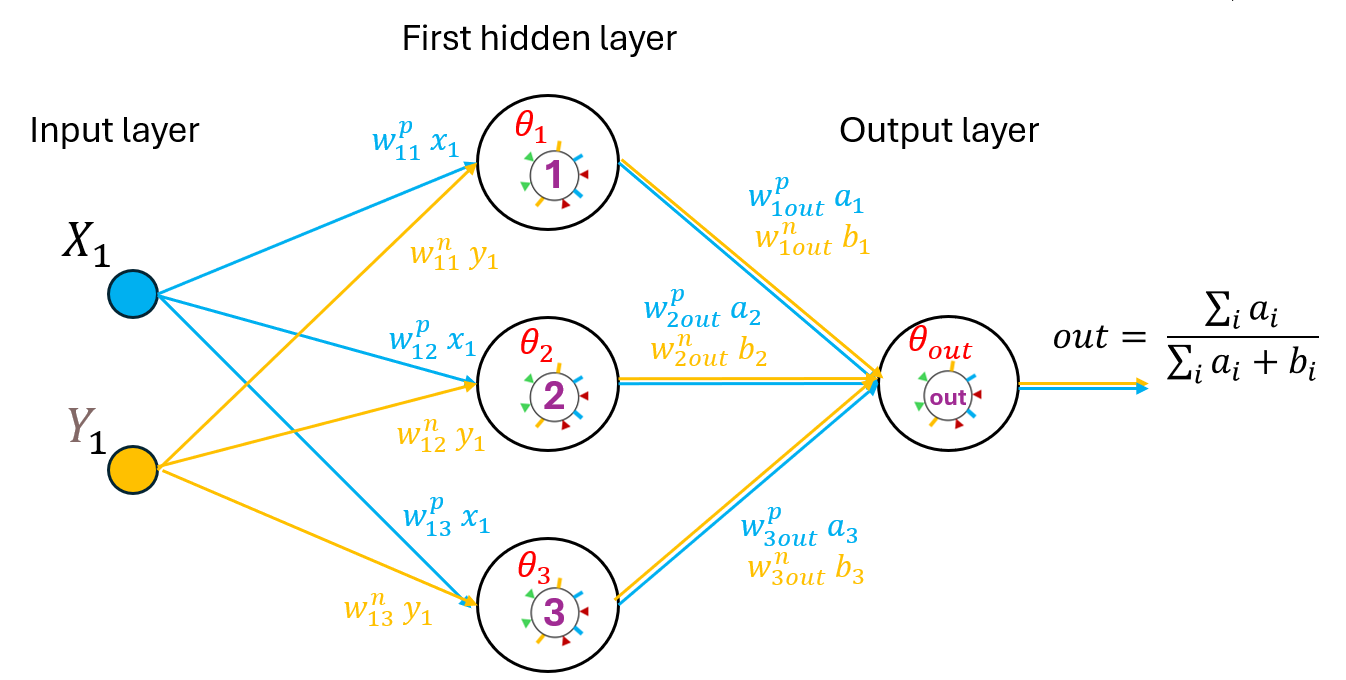

### 2.1 Layer and $\lambda$ dependency of the classification performance

We have the choice to select two pooling methods. The first one ('1') is to sum all output of all neurons without keeping neurons labels, the second one ('2') is to keep the vectorial structure of the output, from the labeling of each neuron.

In [1]:
# Simple Lambda Exploration - Based on Original Fast Code

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm
import math  # à ajouter en haut si pas déjà fait

# Parametres globaux
lambda_a = 1.0
lambda_b = 1.0
ka = 0.5
kb = 0.5
eta_a = 0.1
eta_b = 0.1
mu_ab = 0.2



def neuron_dynamics(t, y, x_in, y_in, w_p_x=1.0, w_p_y=1.0):
    a, b = y
    da_dt = w_p_x * x_in + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = w_p_y * y_in + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]

# Couche commune a l'approche 1 et 2
def simulate_layer(X_bulk_vec, Y_bulk_vec, n_neurons, lambda_override=None):
    X_total = np.sum(X_bulk_vec)
    Y_total = np.sum(Y_bulk_vec)
    lambda_total = lambda_override if lambda_override is not None else (X_total + Y_total) / n_neurons

    r = X_total / (X_total + Y_total) if (X_total + Y_total) > 0 else 0.0
    p_vec = X_bulk_vec / X_total if X_total > 0 else np.zeros_like(X_bulk_vec)
    q_vec = Y_bulk_vec / Y_total if Y_total > 0 else np.zeros_like(Y_bulk_vec)

    a_vec = []
    b_vec = []
    for _ in range(n_neurons):
        n = np.random.poisson(lambda_total)
        m = np.random.binomial(n, r) if n > 0 else 0

        x_vec = np.random.multinomial(m, p_vec) if m > 0 else np.zeros_like(X_bulk_vec)
        y_vec = np.random.multinomial(n - m, q_vec) if (n - m) > 0 else np.zeros_like(Y_bulk_vec)

        x_in = np.sum(x_vec)
        y_in = np.sum(y_vec)

        sol = solve_ivp(neuron_dynamics, [0, 50], [0.0, 0.0], args=(x_in, y_in), method='LSODA')
        a_vec.append(sol.y[0, -1])
        b_vec.append(sol.y[1, -1])

    return np.array(a_vec), np.array(b_vec)

# Approche 1 : outputs sommees a chaque couche
def simulate_network_sum(X_vec, Y_vec, n_layers, n_neurons, lambda_override=None):
    for _ in range(n_layers):
        a_out, b_out = simulate_layer(X_vec, Y_vec, n_neurons, lambda_override=lambda_override)
        X_vec = np.array([np.sum(a_out)])
        Y_vec = np.array([np.sum(b_out)])
    return np.sum(X_vec), np.sum(Y_vec)

# Approche 2 : outputs gardes en vecteurs
def simulate_network_vector(X, Y, n_layers, n_neurons, lambda_override=None):
    X_vec = np.full(n_neurons, X / n_neurons)
    Y_vec = np.full(n_neurons, Y / n_neurons)

    for _ in range(n_layers):
        X_vec, Y_vec = simulate_layer(X_vec, Y_vec, n_neurons, lambda_override=lambda_override)

    return np.sum(X_vec), np.sum(Y_vec)

def run_simulation(n_layers, n_neurons, n_points, lambda_override=None):
    """Run simulation for a given lambda value"""
    # --- Grille de simulation ---
    x_vals = np.linspace(0,100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)
    Z_grid = np.zeros_like(X_grid)

    lambda_str = f"λ={lambda_override}" if lambda_override is not None else "λ=auto"
    iterator = tqdm(range(X_grid.size), desc=f"Simulation {lambda_str}")

    for idx in iterator:
        i = idx // X_grid.shape[1]
        j = idx % X_grid.shape[1]

        X_input = X_grid[i, j]
        Y_input = Y_grid[i, j]

        if approach == 1:
            a_final, b_final = simulate_network_sum(np.array([X_input]), np.array([Y_input]), n_layers, n_neurons, lambda_override)
        elif approach == 2:
            a_final, b_final = simulate_network_vector(X_input, Y_input, n_layers, n_neurons, lambda_override)
        else:
            raise ValueError("Approach must be 1 or 2")

        Z_grid[i, j] = a_final / (a_final + b_final) if (a_final + b_final) > 0 else 0.0

    return X_grid, Y_grid, Z_grid


In [2]:
# --- Main execution ---
if __name__ == "__main__":

    # Poids fixes pour tous les neurones
    neuron_weights = [(np.random.uniform(0.5, 1.5), np.random.uniform(0.5, 1.5))for _ in range(n_neurons)]

    # Choix de l'approche: 1 = somme (approche 1), 2 = vectorielle (approche 2)
    approach = 2  # Changez ici pour switcher entre 1 ou 2
    # === SIMULATION PARAMETERS ===
    n_layers = 2          # Number of layers in the network
    n_neurons = 2          # Number of neurons per layer
    n_points = 80       # Number of points for x and y grids (50x50 = 2500 points)
    
    # Test different lambda values
    lambda_values = [None, 1.0, 10.0, 60.0,150.0]
    
    print(f"Testing λ values with approach {approach}")
    print(f"Network: {n_layers} layers, {n_neurons} neurons per layer")
    print(f"Grid: {n_points}x{n_points} points")
    print("=" * 50)
    
    results = {}
    
    for lambda_val in lambda_values:
        print(f"\nRunning with λ = {lambda_val if lambda_val is not None else 'auto'}")
        
        # Run simulation
        X_grid, Y_grid, Z_grid = run_simulation(n_layers, n_neurons, n_points, lambda_val)
        
        # Store results
        results[lambda_val] = (X_grid, Y_grid, Z_grid)
    
    # Plot comparison
    print("\nGenerating comparison plot...")

    n_plots = len(lambda_values)
    n_cols = math.ceil(math.sqrt(n_plots))
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = np.atleast_1d(axes).flatten()  # toujours obtenir un tableau plat, même pour 1 subplot

    for i, lambda_val in enumerate(lambda_values):
        X_grid, Y_grid, Z_grid = results[lambda_val]

        im = axes[i].contourf(Y_grid, X_grid, Z_grid, levels=50, cmap='viridis', vmin=0, vmax=1)

        lambda_str = f"λ={lambda_val}" if lambda_val is not None else "λ=auto"
        axes[i].set_title(lambda_str)
        axes[i].set_xlabel('y (négatif)')
        axes[i].set_ylabel('x (positif)')

    # Add colorbar
    cbar = plt.colorbar(im, ax=axes[i])
    cbar.set_label('Fraction a', fontsize=10)

    # Supprime les axes inutilisés si le nombre de subplots dépasse le nombre de lambda_values
    for j in range(len(lambda_values), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Comparaison des valeurs de λ - Approche {approach} ({n_layers} layers, {n_neurons} neurons)', fontsize=16)
    plt.tight_layout()
    plt.show()

print("\nSimulation completed!")

NameError: name 'n_neurons' is not defined

regarder pour de plus plus petites valeurs de N et P, pour se limiter au cas bistable 

We simulated a neural network of 1 layer with 3 neurons. We ploted the decision boundary for differents values of $\lambda$ which is the average number of inputs in each neuron. $\lambda_{auto}$ is the total number of inputs in the bulk divided by the number of neuron. We observe that the higher $\lambda$ is, the more and more defined the boundary is. Indeed, the spread of the boundary is a result of the bulk sampling. Thus, the more input there are, the lower the effect of sampling is. This is what we oberse below, where we ploted the anti diagonal output profile of previous graph.


Lancement des simulations le long de la diagonale...


Diag λ=1000.0: 100%|██████████| 120/120 [00:01<00:00, 98.17it/s] 


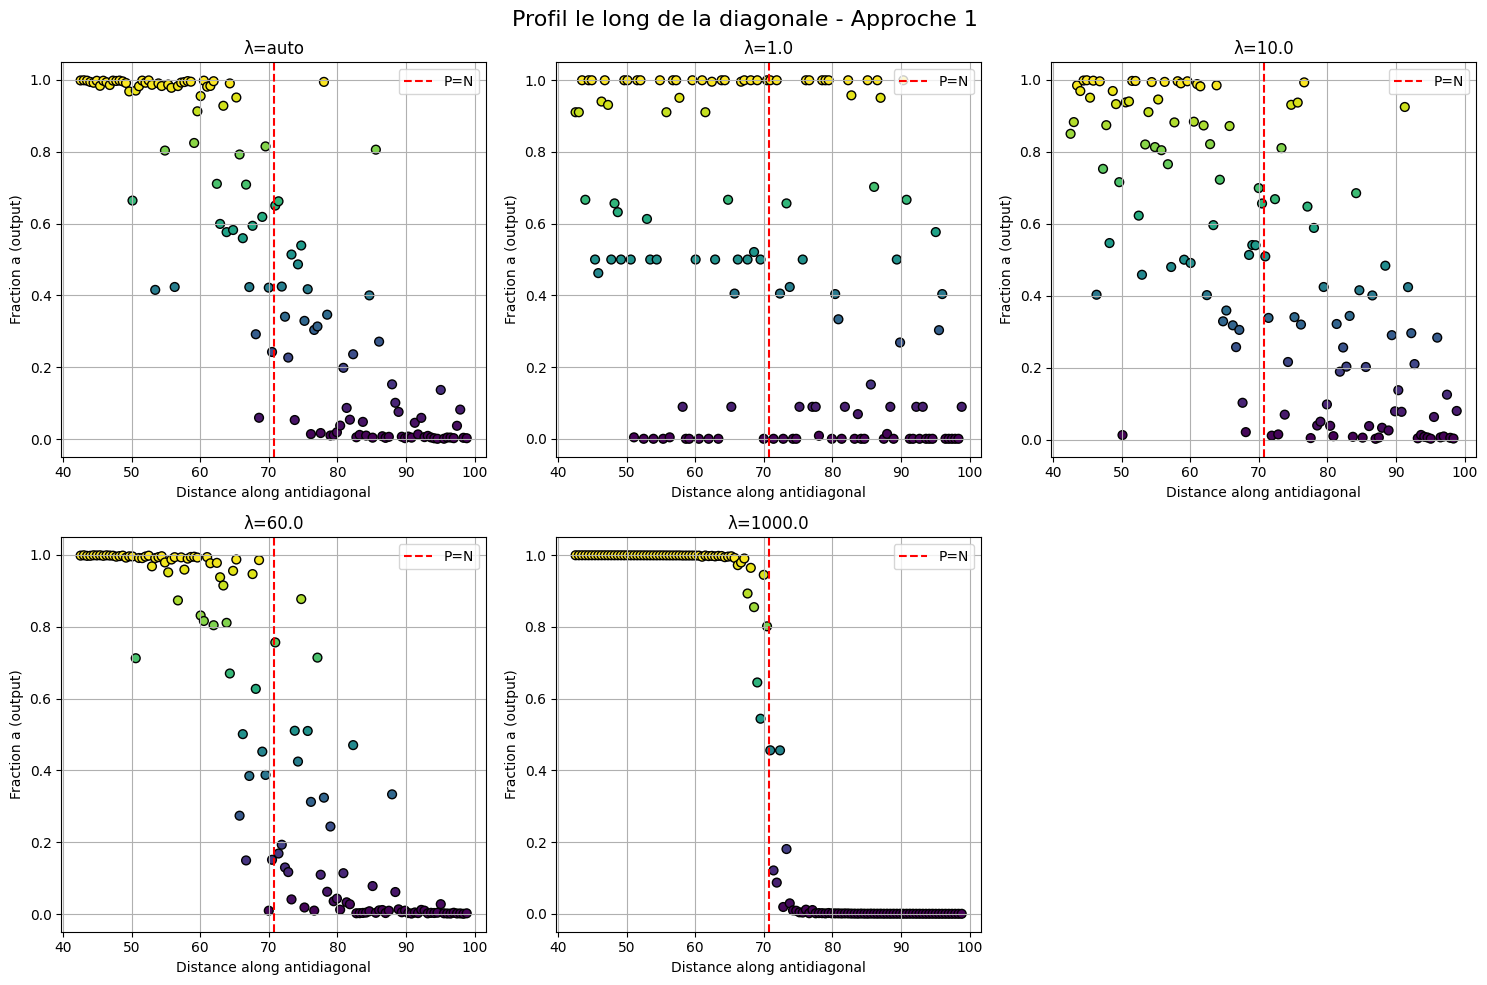

In [ ]:
# --- PARTIE DIAGONALE POUR TOUTES LES VALEURS DE LAMBDA ---

print("\nLancement des simulations le long de la diagonale...")

# Préparation des paramètres diagonaux
max_val = 100
center = max_val / 2
width_fraction = 0.4

diag_length = np.sqrt(2) * max_val
half_window = diag_length * width_fraction / 2

n_diag_points = 300
P_full = np.linspace(max_val, 0, n_diag_points)
N_full = np.linspace(0, max_val, n_diag_points)

dist_full = np.sqrt((P_full - P_full[0])**2 + (N_full - N_full[0])**2)
center_dist = diag_length / 2
mask = (dist_full >= center_dist - half_window) & (dist_full <= center_dist + half_window)

P_diag = P_full[mask]
N_diag = N_full[mask]
dist_diag = dist_full[mask]

# Subplots pour les courbes diagonales
fig_diag, axes_diag = plt.subplots(2, 3, figsize=(15, 10))
axes_diag = axes_diag.flatten()

for i, lambda_val in enumerate(lambda_values):
    Z_diag = []
    desc = f"Diag λ={lambda_val if lambda_val is not None else 'auto'}"
    for P_input, N_input in tqdm(zip(P_diag, N_diag), total=len(P_diag), desc=desc):
        if approach == 1:
            a_final, b_final = simulate_network_sum(np.array([P_input]), np.array([N_input]), n_layers, n_neurons, lambda_override=lambda_val)
        elif approach == 2:
            a_final, b_final = simulate_network_vector(P_input, N_input, n_layers, n_neurons, lambda_override=lambda_val)
        else:
            raise ValueError("Approach must be 1 or 2")

        ratio = a_final / (a_final + b_final) if (a_final + b_final) > 0 else 0.0
        Z_diag.append(ratio)

    Z_diag = np.array(Z_diag)
    
    ax = axes_diag[i]
    sc = ax.scatter(dist_diag, Z_diag, c=Z_diag, cmap='viridis', s=40, edgecolor='black')
    ax.axvline(x=center_dist, color='red', linestyle='--', linewidth=1.5, label='P=N')
    lambda_str = f"λ={lambda_val}" if lambda_val is not None else "λ=auto"
    ax.set_title(lambda_str, fontsize=12)
    ax.set_xlabel('Distance along antidiagonal')
    ax.set_ylabel('Fraction a (output)')
    ax.legend(fontsize=10)
    ax.grid(True)

# Supprimer les axes inutiles si <6 lambdas
for j in range(len(lambda_values), len(axes_diag)):
    fig_diag.delaxes(axes_diag[j])

plt.suptitle(f'Profil le long de la diagonale - Approche {approach}', fontsize=16)
plt.tight_layout()
plt.show()



Testing different layer counts with λ = None and approach 2
Network: 3 neurons per layer
Grid: 50x50 points

Running with n_layers = 1


Simulation λ=auto: 100%|██████████| 2500/2500 [00:11<00:00, 210.14it/s]



Running with n_layers = 2


Simulation λ=auto: 100%|██████████| 2500/2500 [00:21<00:00, 118.80it/s]



Running with n_layers = 3


Simulation λ=auto: 100%|██████████| 2500/2500 [00:26<00:00, 93.32it/s]



Running with n_layers = 5


Simulation λ=auto: 100%|██████████| 2500/2500 [00:36<00:00, 68.26it/s]



Generating comparison plot...


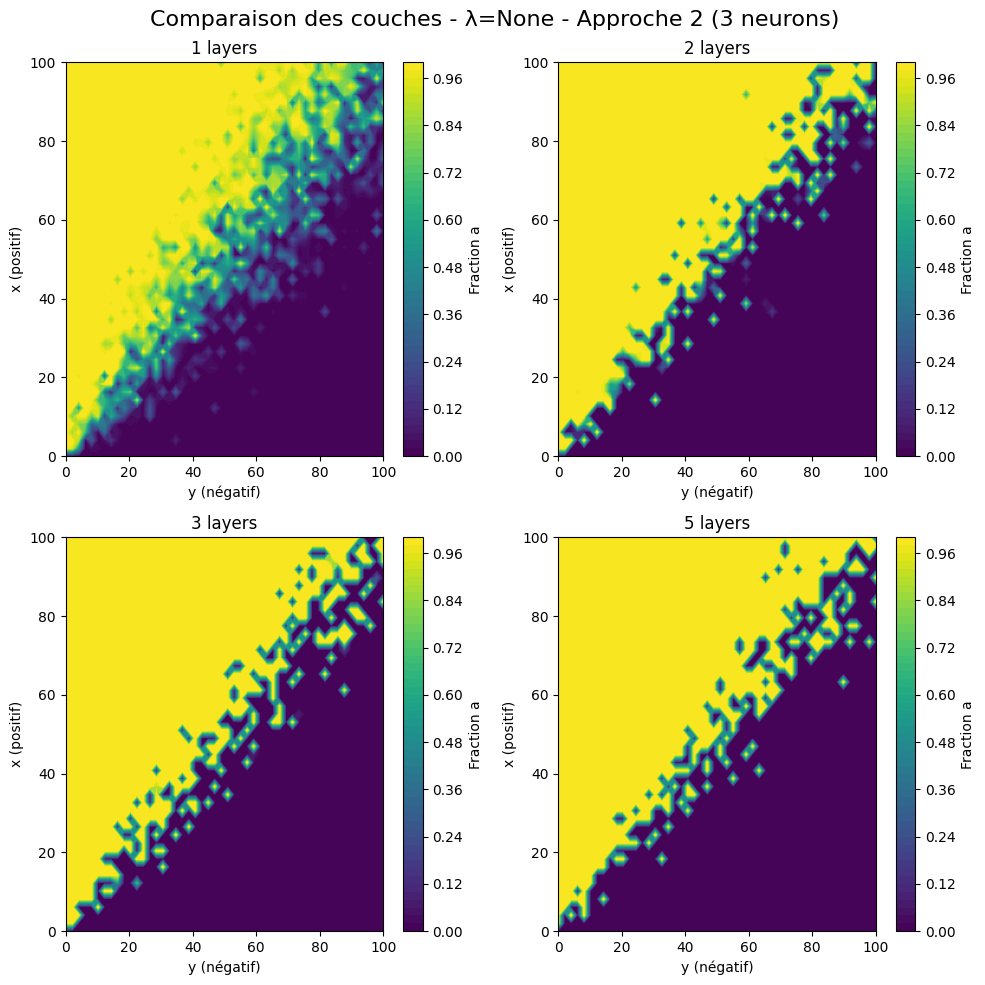


Simulation completed!


In [ ]:
# --- Main execution ---
if __name__ == "__main__":
    import math  # à ajouter si pas déjà importé

    # Choix de l'approche: 1 = somme (approche 1), 2 = vectorielle (approche 2)
    approach = 2  # Changez ici pour switcher entre 1 ou 2

    # === SIMULATION PARAMETERS ===
    n_neurons = 3          # Nombre de neurones par couche
    n_points = 50          # Nombre de points pour x et y (50x50)
    #lambda_val = None # Fixe une seule valeur de lambda pour cette analyse

    layer_values = [1, 2, 3, 5]  # Valeurs de n_layers à tester

    print(f"Testing different layer counts with λ = {lambda_val} and approach {approach}")
    print(f"Network: {n_neurons} neurons per layer")
    print(f"Grid: {n_points}x{n_points} points")
    print("=" * 50)

    results = {}

    for n_layers in layer_values:
        print(f"\nRunning with n_layers = {n_layers}")
        
        # Run simulation
        X_grid, Y_grid, Z_grid = run_simulation(n_layers, n_neurons, n_points, lambda_val)
        
        # Store results
        results[n_layers] = (X_grid, Y_grid, Z_grid)

    # Plot comparison
    print("\nGenerating comparison plot...")

    n_plots = len(layer_values)
    n_cols = math.ceil(math.sqrt(n_plots))
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = np.atleast_1d(axes).flatten()  # Pour gérer le cas n_layers = 1

    for i, n_layers in enumerate(layer_values):
        X_grid, Y_grid, Z_grid = results[n_layers]

        im = axes[i].contourf(Y_grid, X_grid, Z_grid, levels=50, cmap='viridis', vmin=0, vmax=1)

        axes[i].set_title(f"{n_layers} layers")
        axes[i].set_xlabel('y (négatif)')
        axes[i].set_ylabel('x (positif)')

        # Add colorbar
        cbar = plt.colorbar(im, ax=axes[i])
        cbar.set_label('Fraction a', fontsize=10)

    # Supprimer les axes inutilisés
    for j in range(len(layer_values), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Comparaison des couches - λ={lambda_val} - Approche {approach} ({n_neurons} neurons)', fontsize=16)
    plt.tight_layout()
    plt.show()

    print("\nSimulation completed!")


We indeed have that the more we add layers, the more defined will be the decision boundary. 

Testing different neuron counts with λ = None and approach 2
Network: 3 layers
Grid: 50x50 points

Running with n_neurons = 1


Simulation λ=auto: 100%|██████████| 2500/2500 [00:09<00:00, 276.63it/s]



Running with n_neurons = 3


Simulation λ=auto: 100%|██████████| 2500/2500 [00:25<00:00, 96.48it/s] 



Running with n_neurons = 10


Simulation λ=auto: 100%|██████████| 2500/2500 [01:28<00:00, 28.26it/s]



Running with n_neurons = 30


Simulation λ=auto: 100%|██████████| 2500/2500 [04:39<00:00,  8.94it/s]



Generating comparison plot...


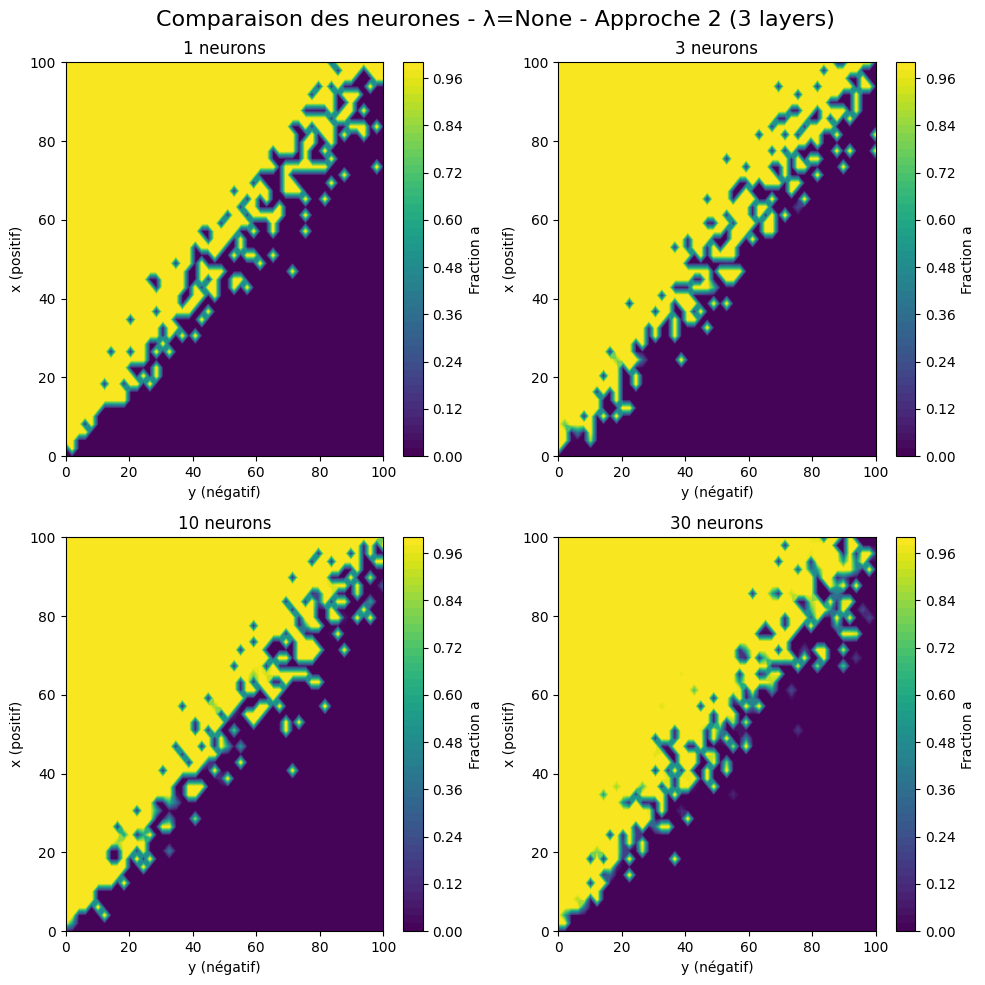


Simulation completed!


In [ ]:
# --- Main execution ---
if __name__ == "__main__":
    import math  # à ajouter si pas déjà importé
    import matplotlib.pyplot as plt
    import numpy as np

    # Choix de l'approche: 1 = somme (approche 1), 2 = vectorielle (approche 2)
    approach = 2  # Changez ici pour switcher entre 1 ou 2

    # === SIMULATION PARAMETERS ===
    n_layers = 3          # Nombre de couches fixé (constante)
    n_points = 50         # Nombre de points pour x et y (50x50)
    # lambda_val doit être défini quelque part avant, sinon fixez-le ici
    # lambda_val = 0.5  

    neuron_values = [1, 3,10,30]  # Différents nombres de neurones à tester

    print(f"Testing different neuron counts with λ = {lambda_val} and approach {approach}")
    print(f"Network: {n_layers} layers")
    print(f"Grid: {n_points}x{n_points} points")
    print("=" * 50)

    results = {}

    for n_neurons in neuron_values:
        print(f"\nRunning with n_neurons = {n_neurons}")
        
        # Run simulation
        X_grid, Y_grid, Z_grid = run_simulation(n_layers, n_neurons, n_points, lambda_val)
        
        # Store results
        results[n_neurons] = (X_grid, Y_grid, Z_grid)

    # Plot comparison
    print("\nGenerating comparison plot...")

    n_plots = len(neuron_values)
    n_cols = math.ceil(math.sqrt(n_plots))
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = np.atleast_1d(axes).flatten()  # Pour gérer le cas n_plots = 1

    for i, n_neurons in enumerate(neuron_values):
        X_grid, Y_grid, Z_grid = results[n_neurons]

        im = axes[i].contourf(Y_grid, X_grid, Z_grid, levels=50, cmap='viridis', vmin=0, vmax=1)

        axes[i].set_title(f"{n_neurons} neurons")
        axes[i].set_xlabel('y (négatif)')
        axes[i].set_ylabel('x (positif)')

        # Add colorbar
        cbar = plt.colorbar(im, ax=axes[i])
        cbar.set_label('Fraction a', fontsize=10)

    # Supprimer les axes inutilisés
    for j in range(len(neuron_values), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Comparaison des neurones - λ={lambda_val} - Approche {approach} ({n_layers} layers)', fontsize=16)
    plt.tight_layout()
    plt.show()

    print("\nSimulation completed!")


### 2.2 Weights tunning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm
import math



def neuron_dynamics(t, y, x_in, y_in, w_p_x=1.0, w_p_y=1.0):
    a, b = y
    da_dt = w_p_x * x_in + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = w_p_y * y_in + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]


def simulate_layer(X_bulk_vec, Y_bulk_vec, n_neurons, lambda_override=None, neuron_weights=None):
    X_total = np.sum(X_bulk_vec)
    Y_total = np.sum(Y_bulk_vec)
    lambda_total = lambda_override if lambda_override is not None else (X_total + Y_total) / n_neurons

    r = X_total / (X_total + Y_total) if (X_total + Y_total) > 0 else 0.0
    p_vec = X_bulk_vec / X_total if X_total > 0 else np.zeros_like(X_bulk_vec)
    q_vec = Y_bulk_vec / Y_total if Y_total > 0 else np.zeros_like(Y_bulk_vec)

    a_vec = []
    b_vec = []
    for i in range(n_neurons):
        n = np.random.poisson(lambda_total)
        m = np.random.binomial(n, r) if n > 0 else 0

        x_vec = np.random.multinomial(m, p_vec) if m > 0 else np.zeros_like(X_bulk_vec)
        y_vec = np.random.multinomial(n - m, q_vec) if (n - m) > 0 else np.zeros_like(Y_bulk_vec)

        x_in = np.sum(x_vec)
        y_in = np.sum(y_vec)

        w_p_x, w_p_y = neuron_weights[i] if neuron_weights is not None else (1.0, 1.0)

        sol = solve_ivp(
            neuron_dynamics, [0, 50], [0.0, 0.0],
            args=(x_in, y_in, w_p_x, w_p_y),
            method='LSODA'
        )

        a_vec.append(sol.y[0, -1])
        b_vec.append(sol.y[1, -1])

    return np.array(a_vec), np.array(b_vec)


def simulate_network_sum(X_vec, Y_vec, n_layers, n_neurons, lambda_override=None, neuron_weights=None):
    for _ in range(n_layers):
        a_out, b_out = simulate_layer(X_vec, Y_vec, n_neurons, lambda_override=lambda_override, neuron_weights=neuron_weights)
        X_vec = np.array([np.sum(a_out)])
        Y_vec = np.array([np.sum(b_out)])
    return np.sum(X_vec), np.sum(Y_vec)


def simulate_network_vector(X, Y, n_layers, n_neurons, lambda_override=None, neuron_weights=None):
    X_vec = np.full(n_neurons, X / n_neurons)
    Y_vec = np.full(n_neurons, Y / n_neurons)

    for _ in range(n_layers):
        X_vec, Y_vec = simulate_layer(X_vec, Y_vec, n_neurons, lambda_override=lambda_override, neuron_weights=neuron_weights)

    return np.sum(X_vec), np.sum(Y_vec)


def run_simulation(n_layers, n_neurons, n_points, lambda_override=None, neuron_weights=None):
    x_vals = np.linspace(0, 100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)
    Z_grid = np.zeros_like(X_grid)

    iterator = tqdm(range(X_grid.size), desc="Simulation")

    for idx in iterator:
        i = idx // X_grid.shape[1]
        j = idx % X_grid.shape[1]

        X_input = X_grid[i, j]
        Y_input = Y_grid[i, j]

        if approach == 1:
            a_final, b_final = simulate_network_sum(
                np.array([X_input]), np.array([Y_input]),
                n_layers, n_neurons,
                lambda_override=lambda_override,
                neuron_weights=neuron_weights
            )
        elif approach == 2:
            a_final, b_final = simulate_network_vector(
                X_input, Y_input,
                n_layers, n_neurons,
                lambda_override=lambda_override,
                neuron_weights=neuron_weights
            )
        else:
            raise ValueError("Approach must be 1 or 2")

        Z_grid[i, j] = a_final / (a_final + b_final) if (a_final + b_final) > 0 else 0.0

    return X_grid, Y_grid, Z_grid




Comparaison de différentes configurations de poids...


Simulation: 100%|██████████| 2500/2500 [00:24<00:00, 101.77it/s]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9380\4210293069.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


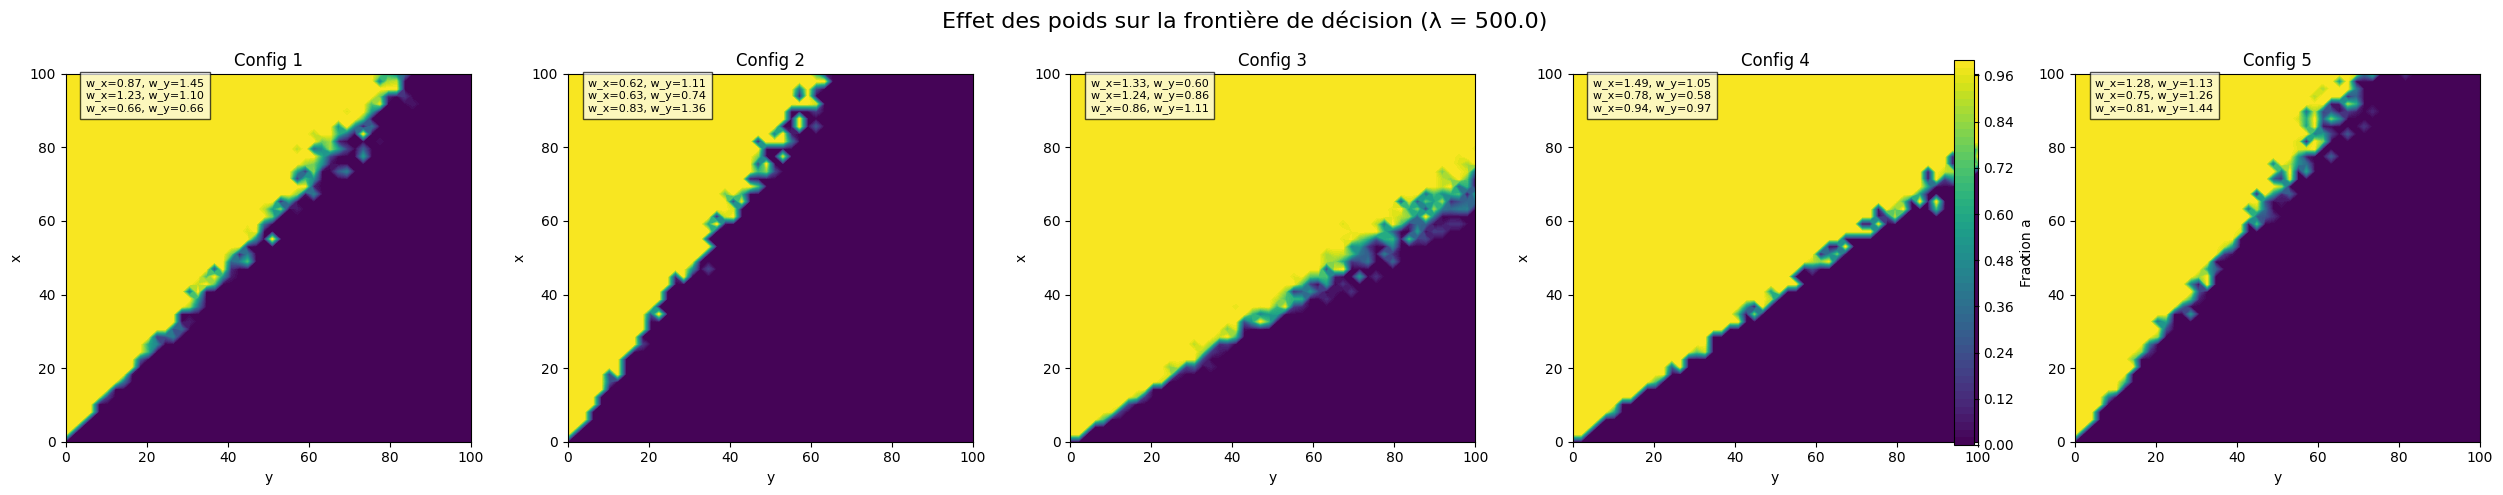

In [ ]:
# --- MAIN ---
if __name__ == "__main__":
    # Paramètres globaux
    lambda_a = 1.0
    lambda_b = 1.0
    ka = 0.5
    kb = 0.5
    eta_a = 0.1
    eta_b = 0.1
    mu_ab = 0.2

    approach = 1
    n_layers = 2
    n_neurons = 3
    n_points = 50
    lambda_val = 500.0

    n_trials = 5
    all_results = []

    print("Comparaison de différentes configurations de poids...")

    for trial in range(n_trials):
        np.random.seed(42 + trial)
        neuron_weights = [
            (np.random.uniform(0.5, 1.5), np.random.uniform(0.5, 1.5))
            for _ in range(n_neurons)
        ]
        X_grid, Y_grid, Z_grid = run_simulation(
            n_layers, n_neurons, n_points,
            lambda_override=lambda_val,
            neuron_weights=neuron_weights
        )
        all_results.append((neuron_weights, Z_grid))

    # --- AFFICHAGE ---
    fig, axes = plt.subplots(1, n_trials, figsize=(5 * n_trials, 5))
    axes = np.atleast_1d(axes).flatten()

    for i, (weights, Z) in enumerate(all_results):
        im = axes[i].contourf(Y_grid, X_grid, Z, levels=50, cmap='viridis', vmin=0, vmax=1)
        label = "\n".join([f"w_x={w[0]:.2f}, w_y={w[1]:.2f}" for w in weights])
        axes[i].set_title(f"Config {i+1}")
        axes[i].set_xlabel("y")
        axes[i].set_ylabel("x")
        axes[i].text(5, 90, label, fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

    cbar = plt.colorbar(im, ax=axes.tolist())
    cbar.set_label('Fraction a')

    plt.suptitle(f"Effet des poids sur la frontière de décision (λ = {lambda_val})", fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from tqdm import tqdm
import math

  # Paramètres globaux
lambda_a = 1.0
lambda_b = 1.0
ka = 0.3
kb = 0.8
eta_a = 0.1
eta_b = 0.1
mu_ab = 0.2


def neuron_dynamics(t, y, x_in, y_in, w_p_x=1.0, w_p_y=1.0):
    a, b = y
    da_dt = w_p_x * x_in + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = w_p_y * y_in + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]

def simulate_layer(X_bulk_vec, Y_bulk_vec, n_neurons, lambda_override=None, neuron_weights=None):
    X_total = np.sum(X_bulk_vec)
    Y_total = np.sum(Y_bulk_vec)
    lambda_total = lambda_override if lambda_override is not None else (X_total + Y_total) / n_neurons

    r = X_total / (X_total + Y_total) if (X_total + Y_total) > 0 else 0.0
    p_vec = X_bulk_vec / X_total if X_total > 0 else np.zeros_like(X_bulk_vec)
    q_vec = Y_bulk_vec / Y_total if Y_total > 0 else np.zeros_like(Y_bulk_vec)

    a_vec = []
    b_vec = []
    for i in range(n_neurons):
        n = np.random.poisson(lambda_total)
        m = np.random.binomial(n, r) if n > 0 else 0

        x_vec = np.random.multinomial(m, p_vec) if m > 0 else np.zeros_like(X_bulk_vec)
        y_vec = np.random.multinomial(n - m, q_vec) if (n - m) > 0 else np.zeros_like(Y_bulk_vec)

        x_in = np.sum(x_vec)
        y_in = np.sum(y_vec)

        w_p_x, w_p_y = neuron_weights[i] if neuron_weights is not None else (1.0, 1.0)

        sol = solve_ivp(
            neuron_dynamics, [0, 50], [0.0, 0.0],
            args=(x_in, y_in, w_p_x, w_p_y),
            method='LSODA'
        )

        a_vec.append(sol.y[0, -1])
        b_vec.append(sol.y[1, -1])

    return np.array(a_vec), np.array(b_vec)

def simulate_network_sum(X_vec, Y_vec, n_layers, n_neurons, lambda_override=None, neuron_weights=None):
    for _ in range(n_layers):
        a_out, b_out = simulate_layer(X_vec, Y_vec, n_neurons, lambda_override=lambda_override, neuron_weights=neuron_weights)
        X_vec = np.array([np.sum(a_out)])
        Y_vec = np.array([np.sum(b_out)])
    return np.sum(X_vec), np.sum(Y_vec)

def run_simulation(n_layers, n_neurons, n_points, lambda_override=None, neuron_weights=None):
    x_vals = np.linspace(0, 100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)
    Z_grid = np.zeros_like(X_grid)

    total_points = X_grid.size
    iterator = tqdm(range(total_points), desc="Simulation")

    for idx in iterator:
        i = idx // X_grid.shape[1]
        j = idx % X_grid.shape[1]
        X_input = X_grid[i, j]
        Y_input = Y_grid[i, j]
        a_final, b_final = simulate_network_sum(np.array([X_input]), np.array([Y_input]),
                                               n_layers, n_neurons,
                                               neuron_weights=neuron_weights,
                                               lambda_override=lambda_override)
        Z_grid[i, j] = a_final / (a_final + b_final) if (a_final + b_final) > 0 else 0.0
    return X_grid, Y_grid, Z_grid




Simulation: 100%|██████████| 2500/2500 [00:15<00:00, 162.35it/s]


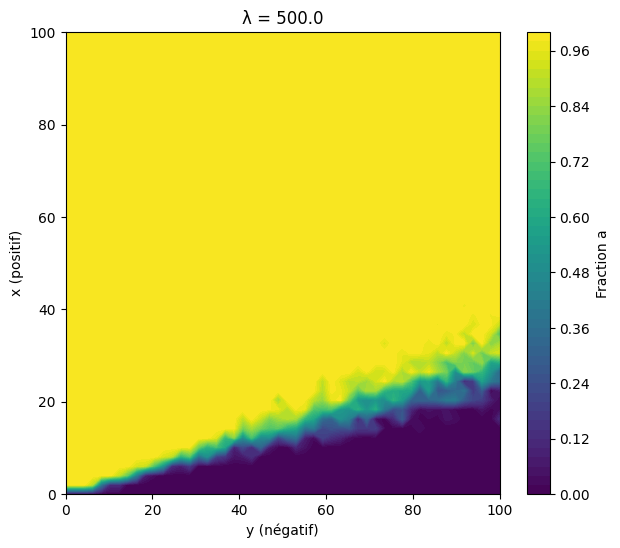

In [ ]:
if __name__ == "__main__":

      # Paramètres globaux
    lambda_a = 1.0
    lambda_b = 1.0
    ka = 0.8
    kb = 0.8
    eta_a = 0.1
    eta_b = 0.1
    mu_ab = 0.2

    
    approach = 1
    n_layers = 1
    n_neurons = 3
    n_points = 50
    lambda_val = 500.0

    # Poids initiaux
    initial_weights = [
        [1.0, 0.2],
        [0.8,0.2],
        [0.8, 0.3],
    ]
    assert len(initial_weights) == n_neurons

    # Grille fixe pour affichage
    x_vals = np.linspace(0, 100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)

    # Calcul de la simulation avec la barre de progression tqdm
    weights = [(w[0], w[1]) for w in initial_weights]
    X_grid, Y_grid, Z_grid = run_simulation(
        n_layers, n_neurons, n_points,
        lambda_override=lambda_val,
        neuron_weights=weights
    )

    # Affichage statique
    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.contourf(Y_grid, X_grid, Z_grid, levels=50, cmap='viridis', vmin=0, vmax=1)
    cbar = fig.colorbar(im, ax=ax, label="Fraction a")
    ax.set_xlabel("y (négatif)")
    ax.set_ylabel("x (positif)")
    ax.set_title(f"λ = {lambda_val}")

    plt.show()



In [ ]:
def neuron_dynamics(t, y, x_vec, y_vec, w_p_x_vec, w_p_y_vec): #prend en input les vecteurs d'inputs et vecteurs de poids
    a, b = y
    da_dt = np.dot(w_p_x_vec, x_vec) + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = np.dot(w_p_y_vec, y_vec) + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]

def simulate_layer(X_bulk_vec, Y_bulk_vec, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override=None):
    X_total = np.sum(X_bulk_vec)
    Y_total = np.sum(Y_bulk_vec)
    lambda_total = lambda_override if lambda_override is not None else (X_total + Y_total) / n_neurons

    r = X_total / (X_total + Y_total) if (X_total + Y_total) > 0 else 0.0
    p_vec = X_bulk_vec / X_total if X_total > 0 else np.zeros_like(X_bulk_vec) #vecteur de proba pour la distribution parmis les especes positives
    q_vec = Y_bulk_vec / Y_total if Y_total > 0 else np.zeros_like(Y_bulk_vec) #vecteur de proba pour la distribution parmis les especes negatives

    a_vec = []
    b_vec = []
    for _ in range(n_neurons):
        n = np.random.poisson(lambda_total)
        m = np.random.binomial(n, r) if n > 0 else 0

        x_vec = np.random.multinomial(m, p_vec) if m > 0 else np.zeros_like(X_bulk_vec)
        y_vec = np.random.multinomial(n - m, q_vec) if (n - m) > 0 else np.zeros_like(Y_bulk_vec)

        sol = solve_ivp(neuron_dynamics, [0, 50], [0.0, 0.0], args=(x_vec, y_vec, w_p_x_vec, w_p_y_vec), method='LSODA')
        a_vec.append(sol.y[0, -1])
        b_vec.append(sol.y[1, -1])

    return np.array(a_vec), np.array(b_vec)

def simulate_network_sum(X_vec, Y_vec, n_layers, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override=None):
    for _ in range(n_layers):
        a_out, b_out = simulate_layer(X_vec, Y_vec, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override=lambda_override)
        X_vec = np.array([np.sum(a_out)])
        Y_vec = np.array([np.sum(b_out)])
        # Adapter poids : on réduit à un poids unique moyen (optionnel, selon modèle)
        w_p_x_vec = np.array([np.sum(w_p_x_vec)])
        w_p_y_vec = np.array([np.sum(w_p_y_vec)])
    return np.sum(X_vec), np.sum(Y_vec)

def simulate_network_vector(X, Y, n_layers, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override=None):
    X_vec = np.full(n_neurons, X / n_neurons)
    Y_vec = np.full(n_neurons, Y / n_neurons)

    # Répéter les poids pour avoir le même nombre de neurones
    w_p_x_vec_rep = np.tile(w_p_x_vec / len(w_p_x_vec), n_neurons)
    w_p_y_vec_rep = np.tile(w_p_y_vec / len(w_p_y_vec), n_neurons)

    for _ in range(n_layers):
        X_vec, Y_vec = simulate_layer(X_vec, Y_vec, n_neurons, w_p_x_vec_rep, w_p_y_vec_rep, lambda_override=lambda_override)

    return np.sum(X_vec), np.sum(Y_vec)

def run_simulation(n_layers, n_neurons, n_points, w_p_x_vec, w_p_y_vec, lambda_override=None):
    """Run simulation for a given lambda value"""
    x_vals = np.linspace(0, 100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)
    Z_grid = np.zeros_like(X_grid)

    lambda_str = f"λ={lambda_override}" if lambda_override is not None else "λ=auto"
    iterator = tqdm(range(X_grid.size), desc=f"Simulation {lambda_str}")

    for idx in iterator:
        i = idx // X_grid.shape[1]
        j = idx % X_grid.shape[1]

        X_input = X_grid[i, j]
        Y_input = Y_grid[i, j]

        if approach == 1:
            a_final, b_final = simulate_network_sum(
                np.array([X_input]), np.array([Y_input]), n_layers, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override)
        elif approach == 2:
            a_final, b_final = simulate_network_vector(
                X_input, Y_input, n_layers, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override)
        else:
            raise ValueError("Approach must be 1 or 2")

        Z_grid[i, j] = a_final / (a_final + b_final) if (a_final + b_final) > 0 else 0.0

    return X_grid, Y_grid, Z_grid



## 3.Analytical work

regarder la dépendance en lambda (papier gabin) lambda environ 1 regime particulier. regarder ce qu'il se passe quand lambda est de 1. \deltax = \delta a pour moi entre le debut et la fin du premier round. fraction de a après un round en fonction de lambda det on drevait voir 2 zones . comparer avec diagramme bulk si lambda>>>1 et tj meme chose alors cpt joue pas

VOIR AVEC DES POIDS DIFFERENTS POUR LES ENTREES ET CE QUE CA CHANGE POUR LA DENSITE DE PROBA


# Improvement

To avoid propagating $b$, we can directly add $N$ inputs onto the bead. In doing so, we effectively tune the weights ourselves. In this configuration, only $a$ is propagated, and the threshold is redefined as $\theta \rightarrow \theta + N$, where $N$ is a fixed input set by the user and does not depend on the negative outputs from the previous layer. With this manupulation, we can add layers and still understanding the dynamics (each neuron is branched to another through one link ($a$) instead of two ($a$ and $b$))


 $x_1,y_1 \sim P_{\lambda}$